In [1]:
import time
import datetime
import numpy as np
from datetime import datetime as dt
from tqdm import *
from datetime import datetime as dt
from tqdm import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os,sys

In [2]:
path_prefix = './data/mean_2min/'
df_list = []
for path in os.listdir(path_prefix):
    ap = '%s/%s' % (path_prefix, path)
    if '.pkl' not in ap:
        continue
    df_list.append(pd.read_pickle(ap))

In [3]:
def apply_trans(df):
    df = df.reset_index(level=0)
    df[df['SensorID'][0]] = df['MonitorValue']
    df = df[[df['SensorID'][0]]]
    return df
df_new_list = [apply_trans(df) for df in df_list]

KeyError: 'MonitorValue'

In [112]:
df = pd.concat(df_new_list,axis=1)

In [113]:
#去除掉大于1.0的毛刺，应该是有问题的记录
def remove_notnormal(df):
    cols = ['009A13', '044A02', '044A03', '044A11']
    for c in cols:
        a = df[c]
        a[a>0.9] = np.NaN
        df[c] = a.fillna(method='ffill')
    return df

In [114]:
df = remove_notnormal(df)

In [115]:
df.columns

Index(['009A13', '044A02', '044A03', '044A09', '044A11', '044A15'], dtype='object')

Series([], Name: 009A13, dtype: float64)

In [4]:
df = pd.read_pickle('%s/gas_censor.pkl' % path_prefix)

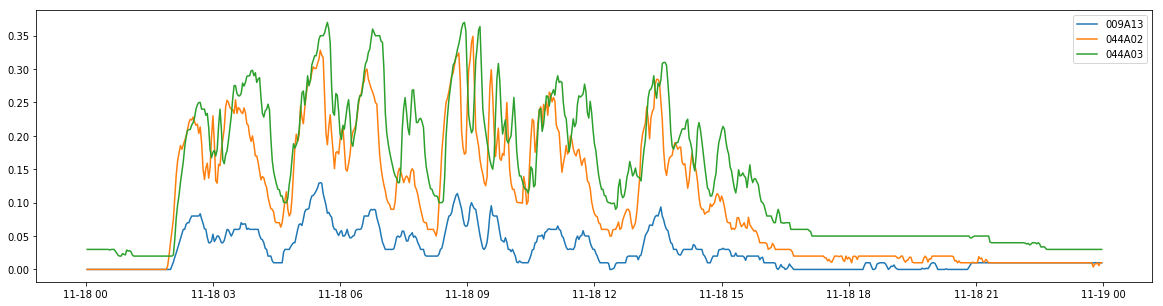

In [8]:
def plot_range_date(data, start, end):
    plt.figure(figsize=(20, 5))
    cols = list(data.columns)
    ttime = 'Time'
    data = data.reset_index()
    data = data[(data[ttime]>start) & (data[ttime]<end)]
#     for c in ['009A13', '044A02', '044A03', '044A11', '044A15']:
    for c in ['009A13', '044A02', '044A03']:
        plt.plot(data[ttime], data[c], label=c)
#     plt.plot(data[ttime], data['044A09']*0.01+1, label='044A09')
    plt.legend()
    plt.show()
plot_range_date(df, '2017-11-18 00:00:00', '2017-11-19 00:00:00')

In [117]:
df['SensorID'] = 'A369'
df = df.reset_index()
df = df.sort_index()
df = df.set_index(['SensorID','Time'])
df.to_pickle('%s/gas_censor.pkl' % path_prefix)